In [75]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
from sklearn.cluster import KMeans
from collections import Counter
import scipy.misc as smp
import webcolors

## get an image and apply face detection algorithm

Source : https://henrydangprg.com/2016/06/26/color-detection-in-python-with-opencv/

In [76]:
cwd = os.getcwd()

In [77]:
path = cwd + '/images'

In [78]:
files = os.listdir(path)

In [80]:
files[-4]

'srk.jpg'

In [84]:
def get_dominant_color(image, k=4, image_processing_size = None):
    if image_processing_size is not None:
        image = cv2.resize(image, image_processing_size,interpolation = cv2.INTER_AREA)
    image = image.reshape((image.shape[0] * image.shape[1], 3)) 
    clt = KMeans(n_clusters = k)
    labels = clt.fit_predict(image)
    label_counts = Counter(labels)
    dominant_color = clt.cluster_centers_[label_counts.most_common(1)[0][0]]

    print(list(dominant_color))
    #img = smp.toimage(dominant_color)
    #plt.figure(figsize=(10,10))
    #plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [85]:
face_cascade = cv2.CascadeClassifier('/usr/share/opencv/haarcascades/haarcascade_frontalface_alt.xml')
def face_recog(photo):
    photo_grey = cv2.cvtColor(photo, cv2.COLOR_BGR2GRAY)
    face_detect = face_cascade.detectMultiScale(photo, scaleFactor=1.3, minNeighbors=3)
    print(len(face_detect))
    for (x,y,w,h) in face_detect:
        cv2.rectangle(photo,(x,y),(x+w,y+h),(255,0,0),2)
        cv2.rectangle(photo_grey,(x,y),(x+w,y+h),(255,0,0),2)
        cv2.rectangle(photo, (x-6*w/10,y+3*h/2),(x+16*w/10,y+3*h),(0,0,255),2)    
        
    for (x,y,w,h) in face_detect:
        crop_img = photo[y+3*h/2:y+3*h, x-6*w/10:x+16*w/10]
        print(get_dominant_color(crop_img))
        plt.figure(figsize=(10,10))
        plt.imshow(cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB))

    
    plt.figure(figsize=(10,10))
    plt.imshow(cv2.cvtColor(photo, cv2.COLOR_BGR2RGB))
    
    #crop_img = photo[y+3*h/2:y+3*h, x-6*w/10:x+16*w/10]
    #plt.figure(figsize=(10,10))
    #plt.imshow(cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB))
    

1
[134.23152478952832, 77.83122120832553, 45.38350071478821]
None


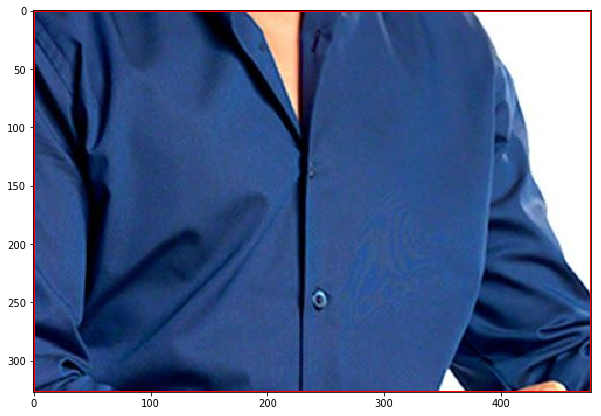

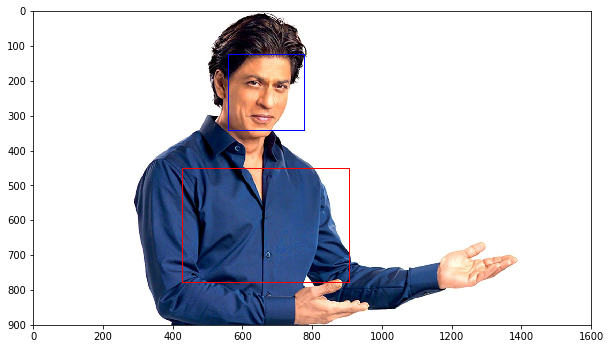

In [86]:
face_recog(cv2.imread(path+ '/' +files[-4]))